In [2]:
import sys, os, time
import shutil
# %load_ext autoreload
# %autoreload 2
os.environ['FOUNDATION_RUN_MODE'] = 'jupyter'
os.environ['FOUNDATION_SAVE_DIR'] = '/is/ei/fleeb/workspace/chome/trained_nets'
os.environ['FOUNDATION_DATA_DIR'] = '/is/ei/fleeb/workspace/local_data'
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
from IPython import display
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.distributions as distrib
import torch.multiprocessing as mp
import torchvision.models
import torchvision
from tqdm import tqdm_notebook as tqdm
from torch.utils.data import Dataset, DataLoader, TensorDataset
import gym
import numpy as np
%matplotlib notebook
# %matplotlib tk
import matplotlib.pyplot as plt
import imageio
import seaborn as sns
# plt.switch_backend('Agg') #('Qt5Agg')
import foundation as fd
from foundation import models
from foundation import util
from foundation import train

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from bisect import bisect_left

# from IPython.display import HTML, Image

#from foundation.util import replicate, Cloner

from hybrid import get_model, get_data
from analyze import *

plt.ioff()

np.set_printoptions(linewidth=120, suppress=True)

In [16]:
x = torch.randint(10,size=(4,)).byte()
x

tensor([5, 8, 5, 0], dtype=torch.uint8)

In [17]:
x + 1

tensor([6, 9, 6, 1], dtype=torch.uint8)

In [18]:
x[0] = 255
x

tensor([255,   8,   5,   0], dtype=torch.uint8)

In [19]:
x + 1

tensor([0, 9, 6, 1], dtype=torch.uint8)

In [3]:
util.set_seed(0)
dataset = train.get_dataset('transfer', new='redball-3dshapes', budget=100,
                            new_kwargs={'dataroot':os.environ['FOUNDATION_DATA_DIR']})
len(dataset)

Filtering out 86375/384000 samples
Filtering out 86375/384000 samples


200

<IPython.core.display.Javascript object>


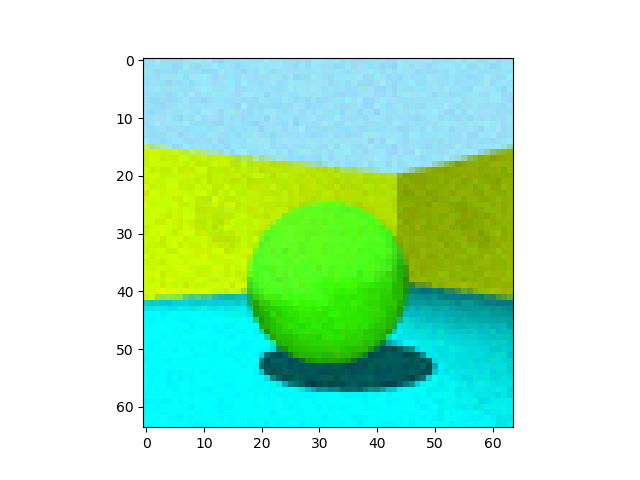

In [13]:
x,y = dataset[5]
x += torch.randn(x.shape)*0.02
x = x.clamp(0,1)
plt.imshow(x.permute(1,2,0).numpy())
plt.show()

In [8]:
plt.close('all')

Traceback (most recent call last):
  File "/is/ei/fleeb/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/is/ei/fleeb/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_nbagg.py", line 236, in <lambda>
    canvas.mpl_connect('close_event', lambda event: Gcf.destroy(num))
  File "/is/ei/fleeb/anaconda3/lib/python3.7/site-packages/matplotlib/_pylab_helpers.py", line 54, in destroy
    cls._activeQue.remove(manager)
ValueError: list.remove(x): x not in list
Traceback (most recent call last):
  File "/is/ei/fleeb/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/is/ei/fleeb/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_nbagg.py", line 236, in <lambda>
    canvas.mpl_connect('close_event', lambda event: Gcf.destroy(num))
  File "/is/ei/fleeb/anaconda3/lib/python3.7/site-packages/matplotlib/_pylab_helpers.py",

In [2]:
M = Hybrid_Controller().filter_strs('!test')

Found 192 runs


In [3]:
M.clear_filters().filter_strs('!test').filter_jobs(167, 168).show_incomplete()

 70/100 3dshapes-dwae_0167-5996239-00_200121-143353
 71/100 3dshapes-fdwae_0167-5996239-02_200121-143401
 61/100 3dshapes-fwae_0168-5996785-00_200121-160855
 61/100 3dshapes-fwae_0168-5996785-01_200121-160855
 61/100 3dshapes-fwae_0168-5996785-02_200121-160855
 61/100 3dshapes-fwae_0168-5996785-03_200121-160858
 61/100 3dshapes-fwae_0168-5996785-04_200121-160854
 61/100 3dshapes-fwae_0168-5996785-05_200121-160857


In [4]:
M.clear_run_cache()

In [5]:
M.clear_filters().filter_strs('!test')

# M.filter_since(date='200114').filter_data('rgbball')
# M.filter_jobs(157, 158)
M.filter_jobs(167, 168)
# M.filter_jobs(94, 122) # basic models
# M.filter_jobs(100, 102)
# M.filter(lambda r: 'adain-dec' in r.config.info.history)
# M.filter_models('wae')

M.filter_checkpoints(60)

M.load_configs(60)

M.show()

Selecting checkpoint: 60


/is/ei/fleeb/workspace/foundation/foundation/train/config.py:58: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f)


  0 - 3dshapes-dwae_0167-5996239-00_200121-143353
  1 - 3dshapes-fdwae_0167-5996239-02_200121-143401
  2 - 3dshapes-fwae_0167-5996239-01_200121-143355
  3 - 3dshapes-fwae_0168-5996785-00_200121-160855
  4 - 3dshapes-fwae_0168-5996785-01_200121-160855
  5 - 3dshapes-fwae_0168-5996785-02_200121-160855
  6 - 3dshapes-fwae_0168-5996785-03_200121-160858
  7 - 3dshapes-fwae_0168-5996785-04_200121-160854
  8 - 3dshapes-fwae_0168-5996785-05_200121-160857


In [6]:
M.show_unique()

  0) 3dshapes-dwae_0167-5996239-00_200121-143353
	model.latent_reg_wt - 0 (100)
	model.prob - 0.5 (1)

  1) 3dshapes-fdwae_0167-5996239-02_200121-143401
	model.reg_prior - 0 (0.5)
	model.prob - 0.5 (1)

  2) 3dshapes-fwae_0167-5996239-01_200121-143355
	model.reg_prior - 0 (0.5)
	model.prob - 0.5 (_)

  3) 3dshapes-fwae_0168-5996785-00_200121-160855
	training.epochs - 60 (100)
	model.latent_reg_wt - 1000.0 (100)
	model.reg_prior - 0.25 (0.5)

  4) 3dshapes-fwae_0168-5996785-01_200121-160855
	training.epochs - 60 (100)
	model.latent_reg_wt - 10000.0 (100)
	model.reg_prior - 0.25 (0.5)

  5) 3dshapes-fwae_0168-5996785-02_200121-160855
	training.epochs - 60 (100)
	model.latent_reg_wt - 1000.0 (100)
	model.reg_prior - 0.1 (0.5)

  6) 3dshapes-fwae_0168-5996785-03_200121-160858
	training.epochs - 60 (100)
	model.latent_reg_wt - 10000.0 (100)
	model.reg_prior - 0.1 (0.5)

  7) 3dshapes-fwae_0168-5996785-04_200121-160854
	training.epochs - 60 (100)
	model.latent_reg_wt - 1000.0 (100)
	model.re

In [23]:
M.clear_run_cache()

In [24]:
run = M[7]
run.name

'3dshapes-fwae_0168-5996785-04_200121-160854'

In [33]:
run.reset()

run.load(pbar=tqdm)
run.run(pbar=tqdm)

/is/ei/fleeb/workspace/chome/trained_nets/3dshapes-fwae_0168-5996785-04_200121-160854/checkpoint_60.pth.tar
True
load successful
Loaded /is/ei/fleeb/workspace/chome/trained_nets/3dshapes-fwae_0168-5996785-04_200121-160854/checkpoint_60.pth.tar
Set dataroot to: /is/ei/fleeb/workspace/local_data
name: 3dshapes


/is/ei/fleeb/workspace/foundation/foundation/train/config.py:58: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f)


Not enough memory to move dataset to cuda
Dataset din=(3, 64, 64), dout=(3, 64, 64)
Model-type: fwpp
latent_disc: None (by default)
reg_prior: 0.05
ldisc_steps: 1 (by default)
ldisc_gp: 10.0 (by default)
encoder (type=double-enc): 
  in_shape --> din: (3, 64, 64) (by parent)
  channels: [64, 64, 64, 128, 128] (by parent)
  factors: 2 (by parent)
  internal_channels: [None, None, None, None, None] (by default)
  squeeze: [False, False, False, False, False] (by default)
  output_nonlin: None (by default)
  latent_dim: 16 (by parent)
  tail (type=nn): 
    input_dim --> din: (128, 2, 2)
    output_dim --> dout: 16
    hidden_dims: [256, 128]
    nonlin: elu (by parent)
    output_nonlin: None (by default)
  nonlin: elu (by parent)
  output_nonlin: None (by default)
  output_norm_type: None (by default)
  down_type: max (by parent)
  norm_type: instance (by parent)
  residual: False (by default)
  optim_type: adam (by parent)
  lr: 0.001 (by parent)
  weight_decay: 0 (by parent)
  momentum

Validation set:   2%|▏         | 5/300 [00:00<00:06, 44.45it/s]

valset: 38400
Using batched data loader


Validation set: 100%|██████████| 300/300 [00:04<00:00, 65.06it/s]

torch.Size([38400, 16])


In [34]:
viz = run.visualize(tqdm)
len(viz), viz.keys()

VIZ: hybrid:  43%|████▎     | 3/7 [00:00<00:00,  8.51it/s]  

torch.Size([38400, 16])


VIZ: traversals: 100%|██████████| 7/7 [00:01<00:00,  3.98it/s]


(7,
 dict_keys(['original', 'recs', 'gens', 'hybrid', 'latent', 'effects', 'traversals']))

<IPython.core.display.Javascript object>


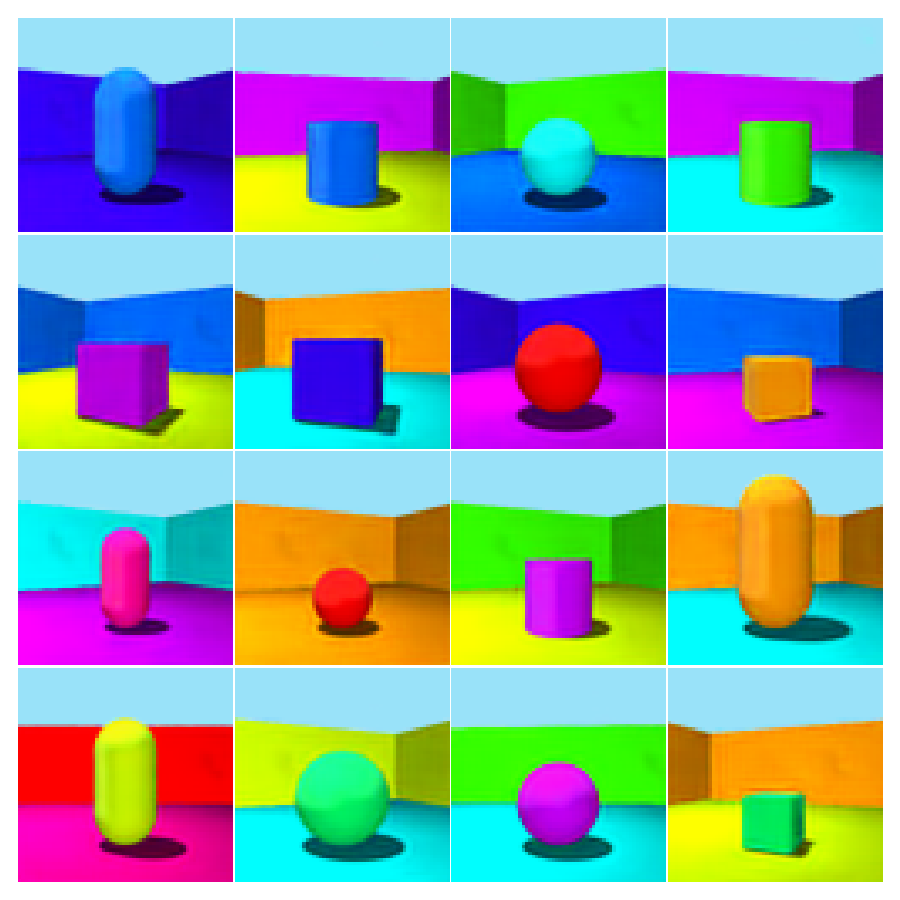

In [35]:
viz['recs'][0].view(scale=2)

<IPython.core.display.Javascript object>


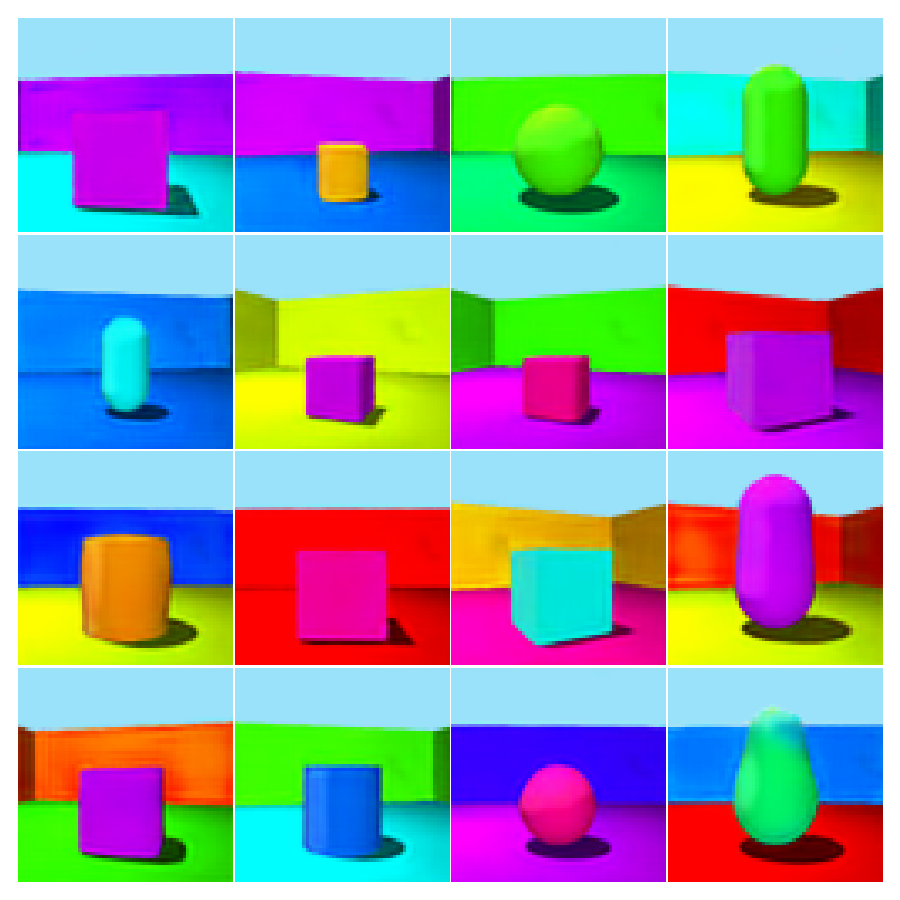

In [36]:
viz['hybrid'][0].view(scale=2)

<IPython.core.display.Javascript object>


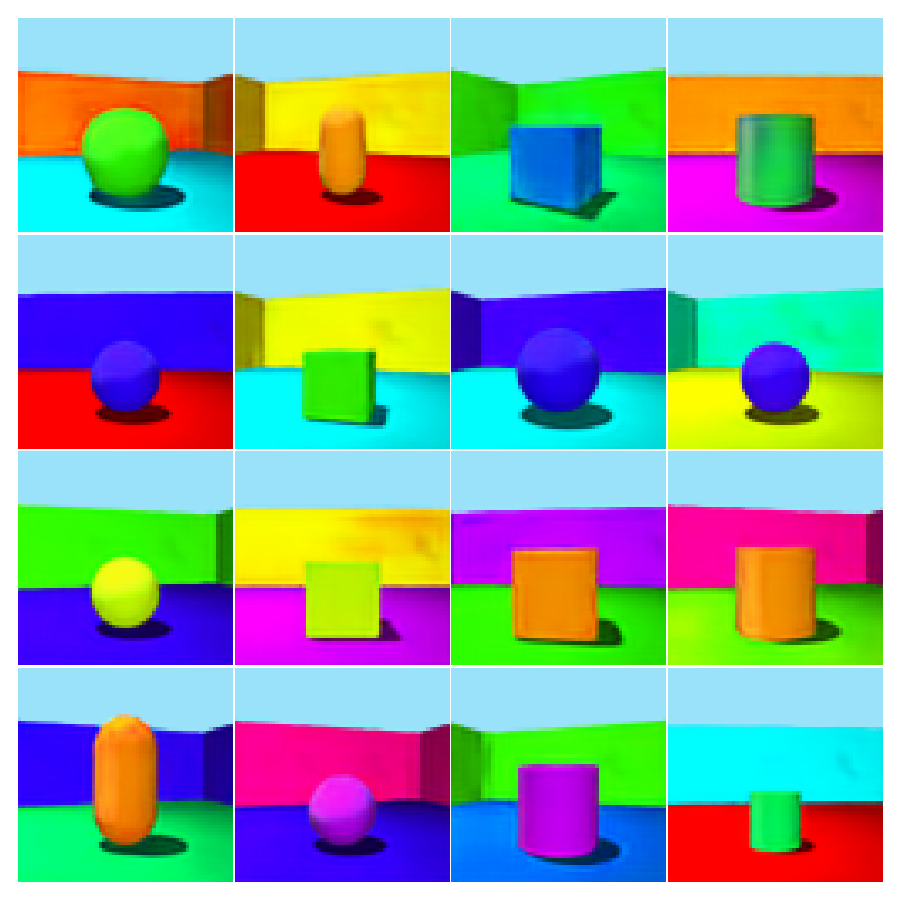

In [37]:
viz['gens'][0].view(scale=2)

In [41]:
viz['traversals'][0].view(scale=2)

<IPython.core.display.Javascript object>


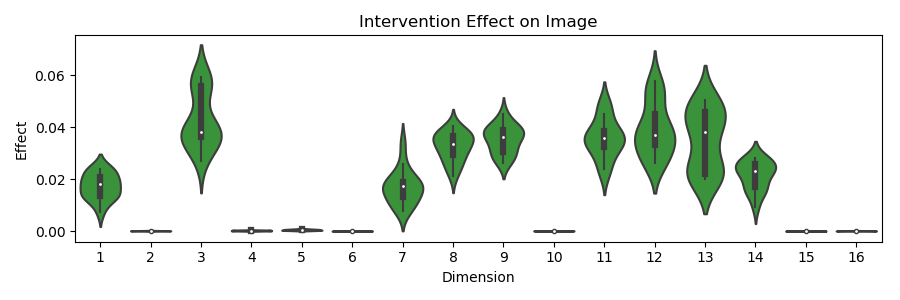

In [39]:
viz['effects'][0].view(scale=2)

<IPython.core.display.Javascript object>


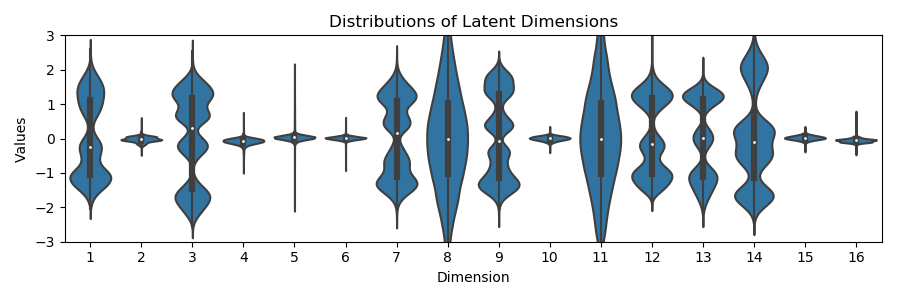

In [40]:
viz['latent'][0].view(scale=2)

In [20]:
# run.config.model.latent_reg_wt

In [21]:
# run.config.model.reg_prior

In [22]:
# media_root = '/is/ei/fleeb/workspace/media/hybrid/new/3dshapes/vaes'
# run.save('test_model/')